In [4]:
from functools import partial
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt
import cv2

import sys
sys.path.append('/home/oscar_palfelt/MSc_thesis/ompl/py-bindings')
from ompl import base as ob
from ompl import control as oc
from ompl import geometric as og

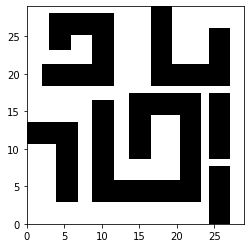

In [5]:
# Load obstacle data
filename = '/home/oscar_palfelt/MSc_thesis/EECS_Degree_Project/motion_planning/data_generation/map_difficult.png'
mapImg = cv2.imread(filename, 0)
blurImg = cv2.blur(mapImg, ksize=(3,3))

occGrid = np.clip(mapImg, 0, 1)
inflatedGrid = np.floor(blurImg / 255)
gridSize = occGrid.shape[0]

plt.imshow(inflatedGrid, extent=[0, gridSize-1, 0, gridSize-1], cmap='gray')
plt.show()

In [44]:
# define planning problem

def isStateValid(spaceInformation, state):
    # perform collision checking or check if other constraints are
    # satisfied
    u = int(np.floor(state.getX() * occGrid.shape[1])) # right pointing image axis
    v = int(np.floor(occGrid.shape[0] * (1 - state.getY()))) # down pointing image axis

    if spaceInformation.satisfiesBounds(state):
        return inflatedGrid[v,u] > 0


def problemDef():
    # construct the state space we are planning in
    #space = ob.DubinsStateSpace(turningRadius=0.05)
    space = ob.SE2StateSpace()

    # set the bounds for the R^2 part of SE(2)
    bounds = ob.RealVectorBounds(2)
    bounds.setLow(0.001)
    bounds.setHigh(0.999)
    space.setBounds(bounds)

    # define a simple setup class
    ss = og.SimpleSetup(space)
    ss.setStateValidityChecker(ob.StateValidityCheckerFn( \
        partial(isStateValid, ss.getSpaceInformation())))

    si = ss.getSpaceInformation()
    planner = og.RRTstar(si)
    ss.setPlanner(planner)

    return ss


def plan(planObj, initState, goalState):

    #space = ob.DubinsStateSpace(turningRadius=0.05)
    space = ob.SE2StateSpace()
    
    start = ob.State(space)
    start().setX(initState[0])
    start().setY(initState[1])
    start().setYaw(initState[2])

    goal = ob.State(space)
    goal().setX(goalState[0])
    goal().setY(goalState[1])
    goal().setYaw(goalState[2])
    
    planObj.setStartAndGoalStates(start, goal, 0.1)

    timeTerminationCondition = ob.timedPlannerTerminationCondition(4.0)
    costTerminationCondition = ob.CostConvergenceTerminationCondition(planObj.getProblemDefinition(), epsilon=0.2)
    orTerminationCondition = ob.plannerOrTerminationCondition(costTerminationCondition, timeTerminationCondition)

    solved = planObj.solve(orTerminationCondition)
    if solved:
        planObj.simplifySolution()



Debug:   RRTstar: Planner range detected to be 0.596436
Info:    RRTstar: No optimization objective specified. Defaulting to optimizing path length for the allowed planning time.
Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 2.24 in 2996 iterations (334 vertices in the graph)
Debug:   CostConvergenceTerminationCondition: Cost of optimizing planner converged after 10 solutions
Info:    RRTstar: Created 2110 new states. Checked 849322 rewire options. 2 goal states in tree. Final solution cost 1.455
Info:    Solution found in 1.657635 seconds
Info:    SimpleSetup: Path simplification took 0.004237 seconds and changed from 7 to 6 states


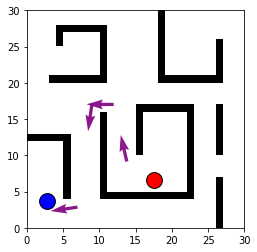

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 1.65 in 5581 iterations (1675 vertices in the graph)
Info:    RRTstar: Created 4225 new states. Checked 1935352 rewire options. 3 goal states in tree. Final solution cost 1.475
Info:    Solution found in 4.000058 seconds
Info:    SimpleSetup: Path simplification took 0.001246 seconds and changed from 5 to 5 states


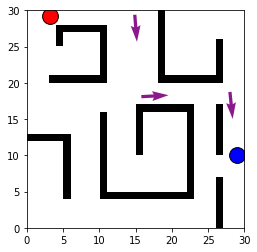

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 2.89 in 7647 iterations (1082 vertices in the graph)
Debug:   CostConvergenceTerminationCondition: Cost of optimizing planner converged after 10 solutions
Info:    RRTstar: Created 2608 new states. Checked 1096232 rewire options. 5 goal states in tree. Final solution cost 1.690
Info:    Solution found in 2.120528 seconds
Info:    SimpleSetup: Path simplification took 0.004202 seconds and changed from 8 to 8 states


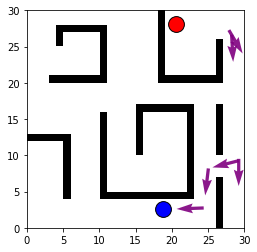

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 1.74 in 8157 iterations (2391 vertices in the graph)
Info:    RRTstar: Created 4211 new states. Checked 1927890 rewire options. 4 goal states in tree. Final solution cost 1.534
Info:    Solution found in 4.000308 seconds
Debug:   The solution path was slightly touching on an invalid region of the state space, but it was successfully fixed.
Info:    SimpleSetup: Path simplification took 0.005507 seconds and changed from 8 to 8 states


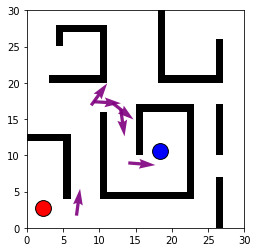

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 3.10 in 1010 iterations (23 vertices in the graph)
Debug:   CostConvergenceTerminationCondition: Cost of optimizing planner converged after 10 solutions
Info:    RRTstar: Created 1307 new states. Checked 468084 rewire options. 4 goal states in tree. Final solution cost 1.054
Info:    Solution found in 0.797309 seconds
Info:    SimpleSetup: Path simplification took 0.004218 seconds and changed from 7 to 7 states


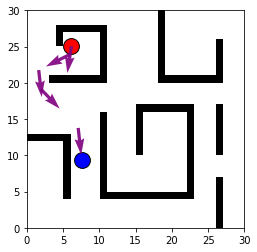

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 0.80 in 29 iterations (8 vertices in the graph)
Info:    RRTstar: Created 4434 new states. Checked 2047090 rewire options. 6 goal states in tree. Final solution cost 0.743
Info:    Solution found in 4.001737 seconds
Info:    SimpleSetup: Path simplification took 0.001026 seconds and changed from 3 to 3 states


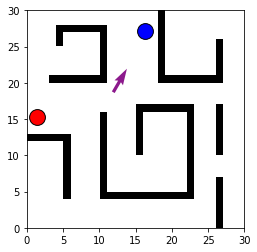

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 3.17 in 2649 iterations (897 vertices in the graph)
Debug:   CostConvergenceTerminationCondition: Cost of optimizing planner converged after 10 solutions
Info:    RRTstar: Created 1819 new states. Checked 708418 rewire options. 1 goal states in tree. Final solution cost 2.486
Info:    Solution found in 1.084009 seconds
Info:    SimpleSetup: Path simplification took 0.006623 seconds and changed from 9 to 6 states


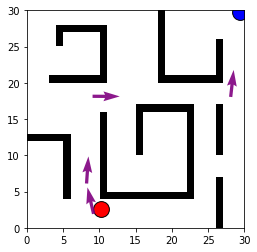

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 1.88 in 7608 iterations (1092 vertices in the graph)
Debug:   CostConvergenceTerminationCondition: Cost of optimizing planner converged after 10 solutions
Info:    RRTstar: Created 3047 new states. Checked 1318985 rewire options. 2 goal states in tree. Final solution cost 1.713
Info:    Solution found in 2.609797 seconds
Info:    SimpleSetup: Path simplification took 0.005659 seconds and changed from 7 to 8 states


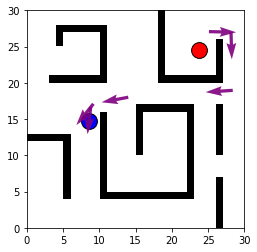

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 1.50 in 2866 iterations (611 vertices in the graph)
Info:    RRTstar: Created 4228 new states. Checked 1936951 rewire options. 4 goal states in tree. Final solution cost 1.064
Info:    Solution found in 4.000770 seconds
Info:    SimpleSetup: Path simplification took 0.003587 seconds and changed from 6 to 6 states


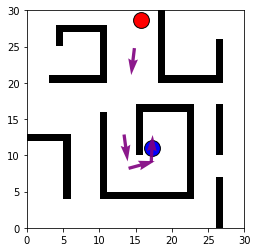

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 2.04 in 430 iterations (33 vertices in the graph)
Info:    RRTstar: Created 4295 new states. Checked 1972704 rewire options. 4 goal states in tree. Final solution cost 0.585
Info:    Solution found in 4.000900 seconds
Debug:   The solution path was slightly touching on an invalid region of the state space, but it was successfully fixed.
Info:    SimpleSetup: Path simplification took 0.002690 seconds and changed from 4 to 4 states


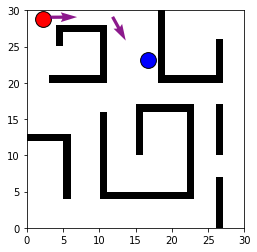

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 0.97 in 5448 iterations (1834 vertices in the graph)
Info:    RRTstar: Created 4431 new states. Checked 2045482 rewire options. 1 goal states in tree. Final solution cost 0.901
Info:    Solution found in 4.000371 seconds
Debug:   The solution path was slightly touching on an invalid region of the state space, but it was successfully fixed.
Info:    SimpleSetup: Path simplification took 0.003103 seconds and changed from 5 to 6 states


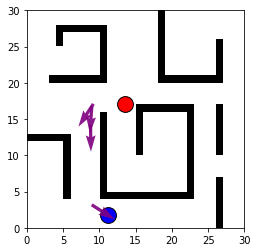

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 2.78 in 754 iterations (131 vertices in the graph)
Debug:   CostConvergenceTerminationCondition: Cost of optimizing planner converged after 10 solutions
Info:    RRTstar: Created 843 new states. Checked 261447 rewire options. 2 goal states in tree. Final solution cost 1.953
Info:    Solution found in 0.368695 seconds
Info:    SimpleSetup: Path simplification took 0.005459 seconds and changed from 7 to 6 states


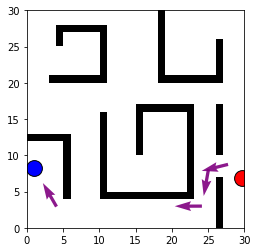

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 2.98 in 8021 iterations (1229 vertices in the graph)
Debug:   CostConvergenceTerminationCondition: Cost of optimizing planner converged after 10 solutions
Info:    RRTstar: Created 2228 new states. Checked 907207 rewire options. 2 goal states in tree. Final solution cost 2.572
Info:    Solution found in 1.663805 seconds
Debug:   The solution path was slightly touching on an invalid region of the state space, but it was successfully fixed.
Info:    SimpleSetup: Path simplification took 0.004914 seconds and changed from 8 to 10 states


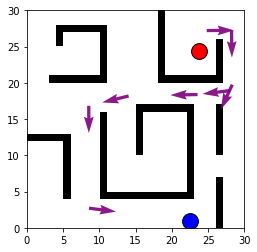

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 2.76 in 1273 iterations (136 vertices in the graph)
Debug:   CostConvergenceTerminationCondition: Cost of optimizing planner converged after 10 solutions
Info:    RRTstar: Created 837 new states. Checked 258867 rewire options. 2 goal states in tree. Final solution cost 1.664
Info:    Solution found in 0.440800 seconds
Info:    SimpleSetup: Path simplification took 0.001577 seconds and changed from 6 to 6 states


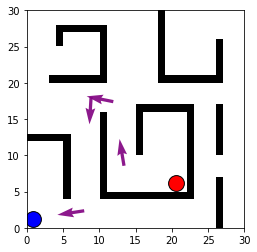

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 1.34 in 11002 iterations (1618 vertices in the graph)
Info:    RRTstar: Created 3909 new states. Checked 1767670 rewire options. 2 goal states in tree. Final solution cost 1.315
Info:    Solution found in 4.000586 seconds
Debug:   The solution path was slightly touching on an invalid region of the state space, but it was successfully fixed.
Info:    SimpleSetup: Path simplification took 0.004099 seconds and changed from 8 to 7 states


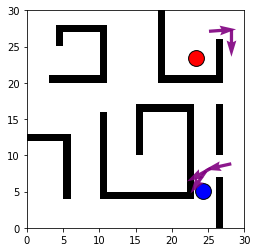

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 1.48 in 2688 iterations (807 vertices in the graph)
Info:    RRTstar: Created 4248 new states. Checked 1947611 rewire options. 4 goal states in tree. Final solution cost 1.263
Info:    Solution found in 4.000119 seconds
Info:    SimpleSetup: Path simplification took 0.002767 seconds and changed from 5 to 7 states


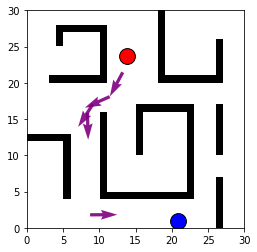

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 2.35 in 1274 iterations (267 vertices in the graph)
Debug:   CostConvergenceTerminationCondition: Cost of optimizing planner converged after 10 solutions
Info:    RRTstar: Created 525 new states. Checked 129011 rewire options. 2 goal states in tree. Final solution cost 1.418
Info:    Solution found in 0.201203 seconds
Info:    SimpleSetup: Path simplification took 0.004288 seconds and changed from 5 to 5 states


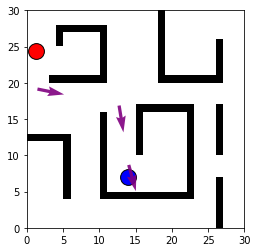

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 2.14 in 3644 iterations (505 vertices in the graph)
Debug:   CostConvergenceTerminationCondition: Cost of optimizing planner converged after 10 solutions
Info:    RRTstar: Created 1230 new states. Checked 432943 rewire options. 4 goal states in tree. Final solution cost 1.761
Info:    Solution found in 0.752579 seconds
Debug:   The solution path was slightly touching on an invalid region of the state space, but it was successfully fixed.
Info:    SimpleSetup: Path simplification took 0.004144 seconds and changed from 8 to 7 states


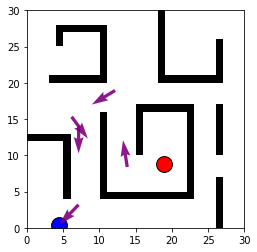

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 4.72 in 407 iterations (56 vertices in the graph)
Debug:   CostConvergenceTerminationCondition: Cost of optimizing planner converged after 10 solutions
Info:    RRTstar: Created 303 new states. Checked 46056 rewire options. 1 goal states in tree. Final solution cost 2.691
Info:    Solution found in 0.099350 seconds
Info:    SimpleSetup: Path simplification took 0.005236 seconds and changed from 9 to 6 states


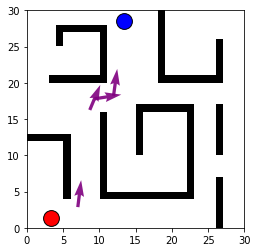

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 2.04 in 7180 iterations (1284 vertices in the graph)
Info:    RRTstar: Created 4244 new states. Checked 1945479 rewire options. 2 goal states in tree. Final solution cost 1.339
Info:    Solution found in 4.000507 seconds
Debug:   The solution path was slightly touching on an invalid region of the state space, but it was successfully fixed.
Info:    SimpleSetup: Path simplification took 0.003662 seconds and changed from 5 to 6 states


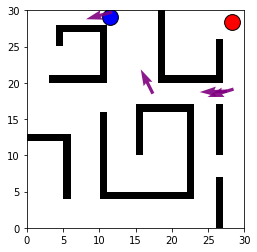

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 1.48 in 1947 iterations (337 vertices in the graph)
Info:    RRTstar: Created 4097 new states. Checked 1867242 rewire options. 6 goal states in tree. Final solution cost 1.022
Info:    Solution found in 4.000868 seconds
Info:    SimpleSetup: Path simplification took 0.002413 seconds and changed from 5 to 5 states


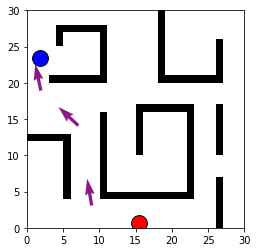

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 3.01 in 8481 iterations (941 vertices in the graph)
Debug:   CostConvergenceTerminationCondition: Cost of optimizing planner converged after 10 solutions
Info:    RRTstar: Created 2023 new states. Checked 806912 rewire options. 1 goal states in tree. Final solution cost 2.730
Info:    Solution found in 1.608319 seconds
Debug:   The solution path was slightly touching on an invalid region of the state space, but it was successfully fixed.
Info:    SimpleSetup: Path simplification took 0.005446 seconds and changed from 9 to 7 states


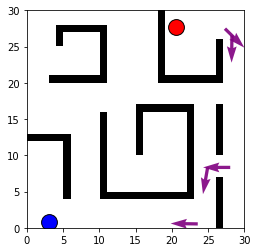

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 1.16 in 3795 iterations (1164 vertices in the graph)
Info:    RRTstar: Created 4210 new states. Checked 1927357 rewire options. 2 goal states in tree. Final solution cost 1.079
Info:    Solution found in 4.000524 seconds
Info:    SimpleSetup: Path simplification took 0.000883 seconds and changed from 4 to 4 states


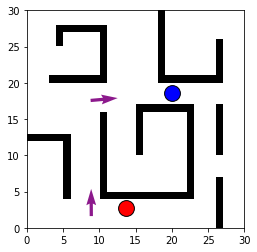

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 4.00 in 2866 iterations (713 vertices in the graph)
Debug:   CostConvergenceTerminationCondition: Cost of optimizing planner converged after 10 solutions
Info:    RRTstar: Created 1961 new states. Checked 776833 rewire options. 2 goal states in tree. Final solution cost 1.676
Info:    Solution found in 1.174336 seconds
Info:    SimpleSetup: Path simplification took 0.002631 seconds and changed from 5 to 6 states


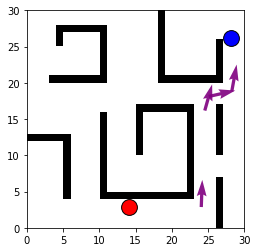

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 1.07 in 1348 iterations (268 vertices in the graph)
Info:    RRTstar: Created 4259 new states. Checked 1953480 rewire options. 3 goal states in tree. Final solution cost 0.913
Info:    Solution found in 4.002186 seconds
Info:    SimpleSetup: Path simplification took 0.001667 seconds and changed from 4 to 3 states


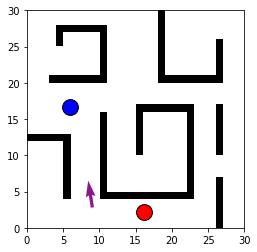

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 4.24 in 508 iterations (71 vertices in the graph)
Info:    RRTstar: Created 3806 new states. Checked 1713356 rewire options. 6 goal states in tree. Final solution cost 1.046
Info:    Solution found in 4.002297 seconds
Info:    SimpleSetup: Path simplification took 0.003751 seconds and changed from 5 to 4 states


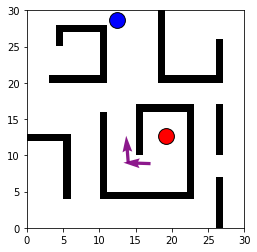

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 1.93 in 11187 iterations (1606 vertices in the graph)
Info:    RRTstar: Created 3940 new states. Checked 1784046 rewire options. 3 goal states in tree. Final solution cost 1.599
Info:    Solution found in 4.000053 seconds
Info:    SimpleSetup: Path simplification took 0.002593 seconds and changed from 7 to 7 states


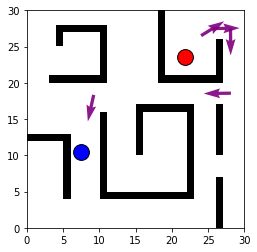

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 1.87 in 3238 iterations (547 vertices in the graph)
Debug:   CostConvergenceTerminationCondition: Cost of optimizing planner converged after 10 solutions
Info:    RRTstar: Created 3894 new states. Checked 1759750 rewire options. 3 goal states in tree. Final solution cost 1.374
Info:    Solution found in 3.901918 seconds
Debug:   The solution path was slightly touching on an invalid region of the state space, but it was successfully fixed.
Info:    SimpleSetup: Path simplification took 0.003515 seconds and changed from 8 to 10 states


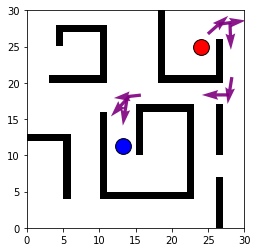

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 2.68 in 1432 iterations (86 vertices in the graph)
Debug:   CostConvergenceTerminationCondition: Cost of optimizing planner converged after 10 solutions
Info:    RRTstar: Created 1536 new states. Checked 574241 rewire options. 3 goal states in tree. Final solution cost 1.118
Info:    Solution found in 1.067169 seconds
Info:    SimpleSetup: Path simplification took 0.002699 seconds and changed from 5 to 7 states


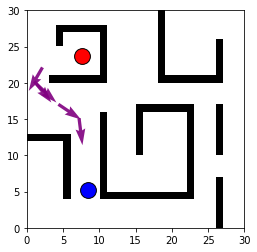

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 1.75 in 304 iterations (43 vertices in the graph)
Debug:   CostConvergenceTerminationCondition: Cost of optimizing planner converged after 10 solutions
Info:    RRTstar: Created 2541 new states. Checked 1062632 rewire options. 5 goal states in tree. Final solution cost 1.132
Info:    Solution found in 2.029616 seconds
Info:    SimpleSetup: Path simplification took 0.002220 seconds and changed from 5 to 7 states


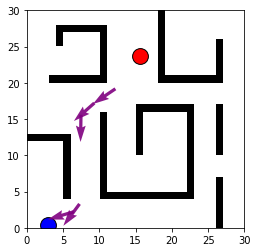

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 2.27 in 3959 iterations (1287 vertices in the graph)
Debug:   CostConvergenceTerminationCondition: Cost of optimizing planner converged after 10 solutions
Info:    RRTstar: Created 2844 new states. Checked 1215442 rewire options. 2 goal states in tree. Final solution cost 1.611
Info:    Solution found in 2.006861 seconds
Info:    SimpleSetup: Path simplification took 0.004800 seconds and changed from 6 to 8 states


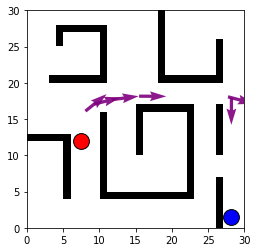

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 1.00 in 604 iterations (90 vertices in the graph)
Info:    RRTstar: Created 4532 new states. Checked 2099696 rewire options. 2 goal states in tree. Final solution cost 0.762
Info:    Solution found in 4.000655 seconds
Info:    SimpleSetup: Path simplification took 0.000590 seconds and changed from 3 to 3 states


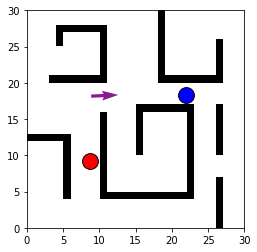

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 1.55 in 171 iterations (23 vertices in the graph)
Info:    RRTstar: Created 4165 new states. Checked 1903394 rewire options. 3 goal states in tree. Final solution cost 1.399
Info:    Solution found in 4.000576 seconds
Info:    SimpleSetup: Path simplification took 0.004927 seconds and changed from 4 to 3 states


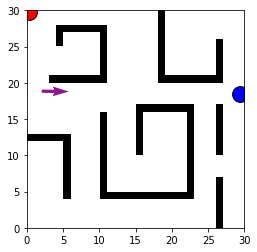

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 2.70 in 3006 iterations (639 vertices in the graph)
Debug:   CostConvergenceTerminationCondition: Cost of optimizing planner converged after 10 solutions
Info:    RRTstar: Created 2273 new states. Checked 929386 rewire options. 2 goal states in tree. Final solution cost 1.126
Info:    Solution found in 1.477938 seconds
Debug:   The solution path was slightly touching on an invalid region of the state space, but it was successfully fixed.
Info:    SimpleSetup: Path simplification took 0.004200 seconds and changed from 5 to 6 states


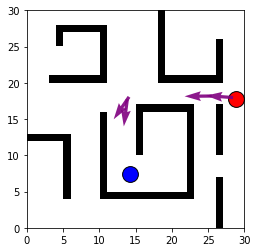

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 1.45 in 10612 iterations (4019 vertices in the graph)
Info:    RRTstar: Created 4094 new states. Checked 1865649 rewire options. 1 goal states in tree. Final solution cost 1.451
Info:    Solution found in 4.000784 seconds
Debug:   The solution path was slightly touching on an invalid region of the state space, but it was successfully fixed.
Info:    SimpleSetup: Path simplification took 0.003032 seconds and changed from 7 to 9 states


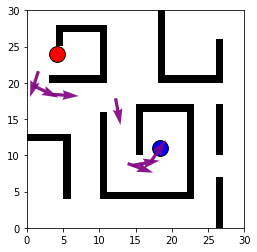

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 2.35 in 2522 iterations (407 vertices in the graph)
Debug:   CostConvergenceTerminationCondition: Cost of optimizing planner converged after 10 solutions
Info:    RRTstar: Created 1610 new states. Checked 609028 rewire options. 3 goal states in tree. Final solution cost 1.272
Info:    Solution found in 0.982927 seconds
Info:    SimpleSetup: Path simplification took 0.002279 seconds and changed from 6 to 8 states


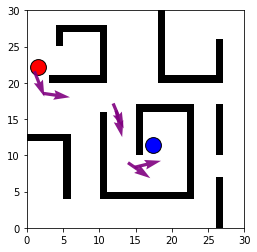

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 2.23 in 1258 iterations (93 vertices in the graph)
Debug:   CostConvergenceTerminationCondition: Cost of optimizing planner converged after 10 solutions
Info:    RRTstar: Created 747 new states. Checked 220495 rewire options. 4 goal states in tree. Final solution cost 0.997
Info:    Solution found in 0.357533 seconds
Debug:   The solution path was slightly touching on an invalid region of the state space, but it was successfully fixed.
Info:    SimpleSetup: Path simplification took 0.002563 seconds and changed from 5 to 5 states


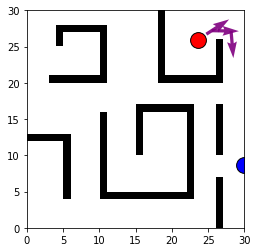

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 1.85 in 537 iterations (36 vertices in the graph)
Info:    RRTstar: Created 4548 new states. Checked 2108304 rewire options. 3 goal states in tree. Final solution cost 1.028
Info:    Solution found in 4.000571 seconds
Info:    SimpleSetup: Path simplification took 0.003992 seconds and changed from 4 to 3 states


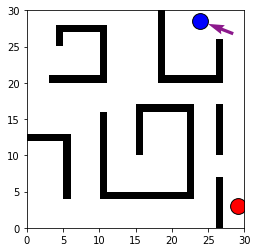

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 2.39 in 144 iterations (21 vertices in the graph)
Debug:   CostConvergenceTerminationCondition: Cost of optimizing planner converged after 10 solutions
Info:    RRTstar: Created 720 new states. Checked 209115 rewire options. 1 goal states in tree. Final solution cost 1.117
Info:    Solution found in 0.323419 seconds
Debug:   The solution path was slightly touching on an invalid region of the state space, but it was successfully fixed.
Info:    SimpleSetup: Path simplification took 0.002802 seconds and changed from 4 to 4 states


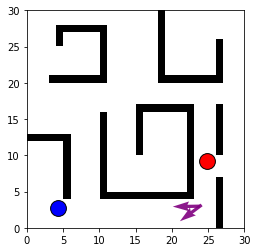

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 2.24 in 1673 iterations (106 vertices in the graph)
Debug:   CostConvergenceTerminationCondition: Cost of optimizing planner converged after 10 solutions
Info:    RRTstar: Created 1347 new states. Checked 486455 rewire options. 2 goal states in tree. Final solution cost 1.552
Info:    Solution found in 0.753054 seconds
Debug:   The solution path was slightly touching on an invalid region of the state space, but it was successfully fixed.
Info:    SimpleSetup: Path simplification took 0.004230 seconds and changed from 6 to 4 states


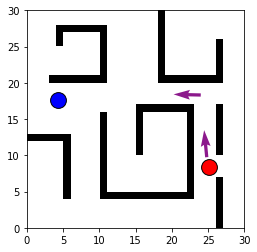

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 1.69 in 1670 iterations (413 vertices in the graph)
Info:    RRTstar: Created 4222 new states. Checked 1933753 rewire options. 4 goal states in tree. Final solution cost 1.242
Info:    Solution found in 4.000450 seconds
Info:    SimpleSetup: Path simplification took 0.003581 seconds and changed from 5 to 5 states


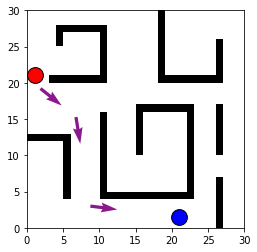

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 2.20 in 3723 iterations (1117 vertices in the graph)
Info:    RRTstar: Created 4429 new states. Checked 2044410 rewire options. 3 goal states in tree. Final solution cost 1.317
Info:    Solution found in 4.000623 seconds
Info:    SimpleSetup: Path simplification took 0.003959 seconds and changed from 6 to 6 states


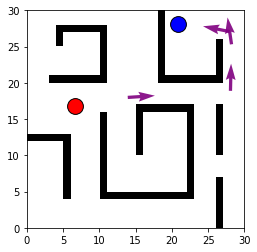

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 4.55 in 427 iterations (61 vertices in the graph)
Debug:   CostConvergenceTerminationCondition: Cost of optimizing planner converged after 10 solutions
Info:    RRTstar: Created 811 new states. Checked 247716 rewire options. 1 goal states in tree. Final solution cost 1.155
Info:    Solution found in 0.332899 seconds
Debug:   The solution path was slightly touching on an invalid region of the state space, but it was successfully fixed.
Info:    SimpleSetup: Path simplification took 0.003573 seconds and changed from 6 to 6 states


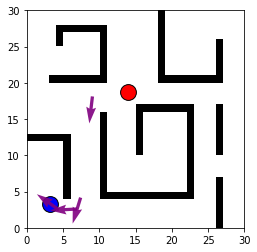

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 1.54 in 224 iterations (28 vertices in the graph)
Info:    RRTstar: Created 4352 new states. Checked 2003174 rewire options. 2 goal states in tree. Final solution cost 1.092
Info:    Solution found in 4.001401 seconds
Info:    SimpleSetup: Path simplification took 0.002048 seconds and changed from 5 to 6 states


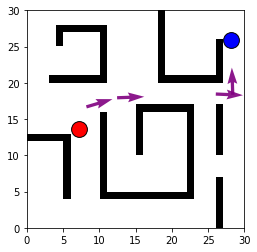

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 1.92 in 2017 iterations (387 vertices in the graph)
Debug:   CostConvergenceTerminationCondition: Cost of optimizing planner converged after 10 solutions
Info:    RRTstar: Created 1083 new states. Checked 366727 rewire options. 2 goal states in tree. Final solution cost 1.305
Info:    Solution found in 0.527576 seconds
Info:    SimpleSetup: Path simplification took 0.002103 seconds and changed from 5 to 6 states


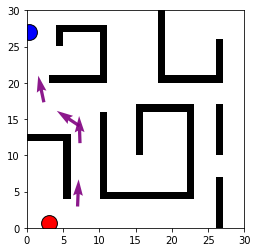

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 4.44 in 1537 iterations (98 vertices in the graph)
Debug:   CostConvergenceTerminationCondition: Cost of optimizing planner converged after 10 solutions
Info:    RRTstar: Created 452 new states. Checked 100133 rewire options. 2 goal states in tree. Final solution cost 1.187
Info:    Solution found in 0.229566 seconds
Info:    SimpleSetup: Path simplification took 0.002333 seconds and changed from 5 to 5 states


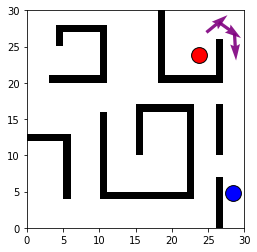

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 4.92 in 470 iterations (45 vertices in the graph)
Debug:   CostConvergenceTerminationCondition: Cost of optimizing planner converged after 10 solutions
Info:    RRTstar: Created 286 new states. Checked 41041 rewire options. 1 goal states in tree. Final solution cost 4.088
Info:    Solution found in 0.090398 seconds
Debug:   The solution path was slightly touching on an invalid region of the state space, but it was successfully fixed.
Info:    SimpleSetup: Path simplification took 0.006905 seconds and changed from 11 to 7 states


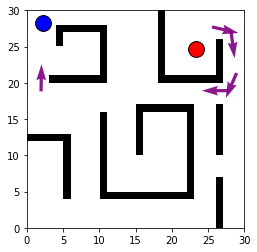

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 2.02 in 568 iterations (77 vertices in the graph)
Debug:   CostConvergenceTerminationCondition: Cost of optimizing planner converged after 10 solutions
Info:    RRTstar: Created 1232 new states. Checked 433851 rewire options. 1 goal states in tree. Final solution cost 1.165
Info:    Solution found in 0.636828 seconds
Info:    SimpleSetup: Path simplification took 0.004095 seconds and changed from 5 to 5 states


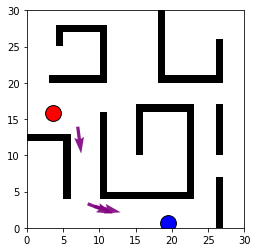

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 2.40 in 2174 iterations (454 vertices in the graph)
Debug:   CostConvergenceTerminationCondition: Cost of optimizing planner converged after 10 solutions
Info:    RRTstar: Created 2766 new states. Checked 1175900 rewire options. 3 goal states in tree. Final solution cost 2.084
Info:    Solution found in 2.332653 seconds
Info:    SimpleSetup: Path simplification took 0.004760 seconds and changed from 9 to 8 states


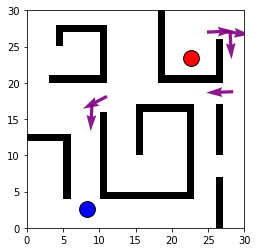

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 3.24 in 5881 iterations (789 vertices in the graph)
Info:    RRTstar: Created 4291 new states. Checked 1970568 rewire options. 3 goal states in tree. Final solution cost 1.724
Info:    Solution found in 4.001449 seconds
Info:    SimpleSetup: Path simplification took 0.004593 seconds and changed from 6 to 7 states


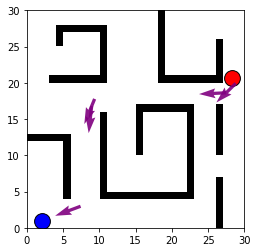

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 2.34 in 600 iterations (73 vertices in the graph)
Debug:   CostConvergenceTerminationCondition: Cost of optimizing planner converged after 10 solutions
Info:    RRTstar: Created 2846 new states. Checked 1216458 rewire options. 3 goal states in tree. Final solution cost 0.970
Info:    Solution found in 2.214671 seconds
Debug:   The solution path was slightly touching on an invalid region of the state space, but it was successfully fixed.
Info:    SimpleSetup: Path simplification took 0.002421 seconds and changed from 4 to 5 states


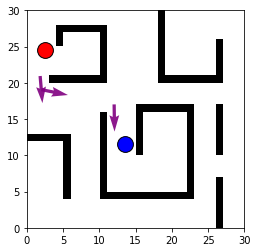

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 2.40 in 1197 iterations (204 vertices in the graph)
Debug:   CostConvergenceTerminationCondition: Cost of optimizing planner converged after 10 solutions
Info:    RRTstar: Created 361 new states. Checked 65341 rewire options. 1 goal states in tree. Final solution cost 1.580
Info:    Solution found in 0.125437 seconds
Info:    SimpleSetup: Path simplification took 0.003330 seconds and changed from 5 to 4 states


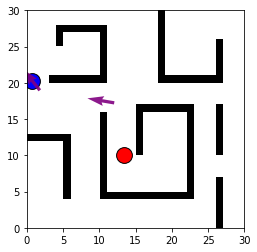

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 1.98 in 1028 iterations (146 vertices in the graph)
Debug:   CostConvergenceTerminationCondition: Cost of optimizing planner converged after 10 solutions
Info:    RRTstar: Created 1820 new states. Checked 708897 rewire options. 5 goal states in tree. Final solution cost 1.548
Info:    Solution found in 1.186933 seconds
Info:    SimpleSetup: Path simplification took 0.005806 seconds and changed from 5 to 3 states


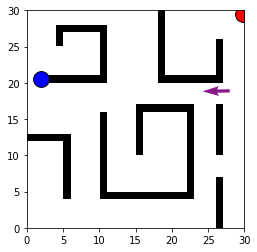

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 3.96 in 7240 iterations (872 vertices in the graph)
Debug:   CostConvergenceTerminationCondition: Cost of optimizing planner converged after 10 solutions
Info:    RRTstar: Created 2201 new states. Checked 893923 rewire options. 4 goal states in tree. Final solution cost 2.039
Info:    Solution found in 1.658920 seconds
Info:    SimpleSetup: Path simplification took 0.004765 seconds and changed from 8 to 8 states


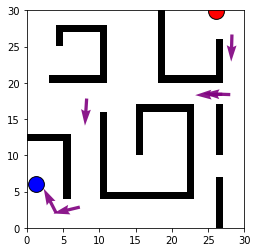

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 2.43 in 2595 iterations (484 vertices in the graph)
Debug:   CostConvergenceTerminationCondition: Cost of optimizing planner converged after 10 solutions
Info:    RRTstar: Created 1265 new states. Checked 448880 rewire options. 3 goal states in tree. Final solution cost 1.578
Info:    Solution found in 0.687854 seconds
Debug:   The solution path was slightly touching on an invalid region of the state space, but it was successfully fixed.
Info:    SimpleSetup: Path simplification took 0.003109 seconds and changed from 6 to 6 states


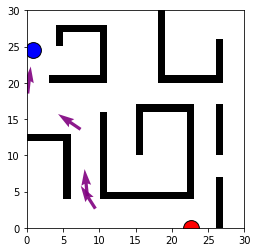

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 3.66 in 544 iterations (54 vertices in the graph)
Debug:   CostConvergenceTerminationCondition: Cost of optimizing planner converged after 10 solutions
Info:    RRTstar: Created 725 new states. Checked 211218 rewire options. 3 goal states in tree. Final solution cost 2.474
Info:    Solution found in 0.326250 seconds
Info:    SimpleSetup: Path simplification took 0.005710 seconds and changed from 8 to 7 states


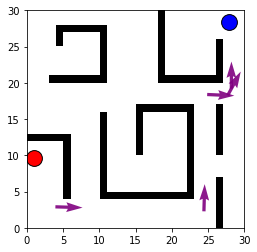

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 1.47 in 5148 iterations (1754 vertices in the graph)
Info:    RRTstar: Created 4146 new states. Checked 1893286 rewire options. 6 goal states in tree. Final solution cost 1.230
Info:    Solution found in 4.001275 seconds
Debug:   The solution path was slightly touching on an invalid region of the state space, but it was successfully fixed.
Info:    SimpleSetup: Path simplification took 0.003959 seconds and changed from 5 to 6 states


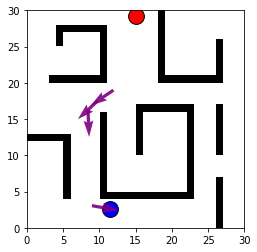

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 1.09 in 3547 iterations (1015 vertices in the graph)
Info:    RRTstar: Created 4186 new states. Checked 1914566 rewire options. 5 goal states in tree. Final solution cost 1.027
Info:    Solution found in 4.001665 seconds
Info:    SimpleSetup: Path simplification took 0.003040 seconds and changed from 4 to 4 states


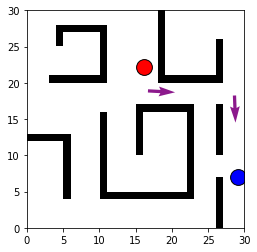

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 2.76 in 7445 iterations (869 vertices in the graph)
Debug:   CostConvergenceTerminationCondition: Cost of optimizing planner converged after 10 solutions
Info:    RRTstar: Created 1680 new states. Checked 642136 rewire options. 5 goal states in tree. Final solution cost 2.046
Info:    Solution found in 1.234539 seconds
Info:    SimpleSetup: Path simplification took 0.005601 seconds and changed from 8 to 8 states


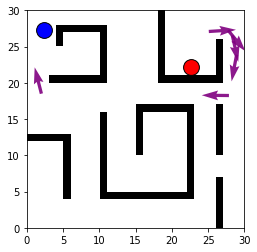

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 2.39 in 7566 iterations (847 vertices in the graph)
Info:    RRTstar: Created 4015 new states. Checked 1823742 rewire options. 5 goal states in tree. Final solution cost 2.032
Info:    Solution found in 4.000047 seconds
Info:    SimpleSetup: Path simplification took 0.006521 seconds and changed from 10 to 10 states


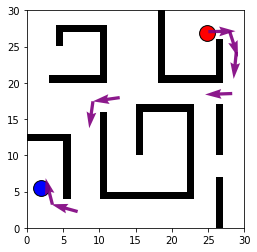

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 0.96 in 3528 iterations (1059 vertices in the graph)
Info:    RRTstar: Created 4223 new states. Checked 1934286 rewire options. 6 goal states in tree. Final solution cost 0.795
Info:    Solution found in 4.000727 seconds
Info:    SimpleSetup: Path simplification took 0.002847 seconds and changed from 4 to 3 states


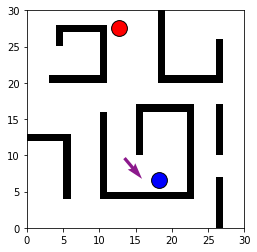

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 4.03 in 2677 iterations (385 vertices in the graph)
Debug:   CostConvergenceTerminationCondition: Cost of optimizing planner converged after 10 solutions
Info:    RRTstar: Created 634 new states. Checked 173310 rewire options. 1 goal states in tree. Final solution cost 3.348
Info:    Solution found in 0.283455 seconds
Info:    SimpleSetup: Path simplification took 0.007230 seconds and changed from 11 to 12 states


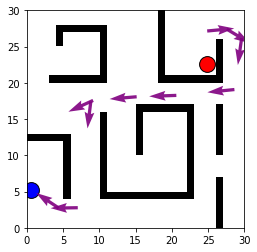

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 1.84 in 5458 iterations (1326 vertices in the graph)
Info:    RRTstar: Created 3962 new states. Checked 1795684 rewire options. 2 goal states in tree. Final solution cost 1.553
Info:    Solution found in 4.000089 seconds
Debug:   The solution path was slightly touching on an invalid region of the state space, but it was successfully fixed.
Info:    SimpleSetup: Path simplification took 0.005168 seconds and changed from 8 to 11 states


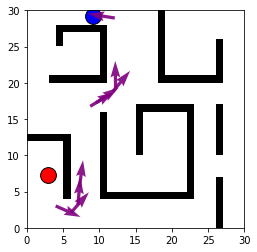

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 0.51 in 27 iterations (6 vertices in the graph)
Info:    RRTstar: Created 4170 new states. Checked 1906054 rewire options. 8 goal states in tree. Final solution cost 0.455
Info:    Solution found in 4.000229 seconds
Info:    SimpleSetup: Path simplification took 0.000001 seconds and changed from 2 to 2 states


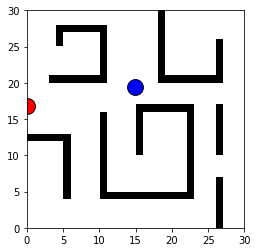

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 2.00 in 642 iterations (72 vertices in the graph)
Info:    RRTstar: Created 4170 new states. Checked 1906054 rewire options. 10 goal states in tree. Final solution cost 0.977
Info:    Solution found in 4.002298 seconds
Info:    SimpleSetup: Path simplification took 0.003410 seconds and changed from 4 to 3 states


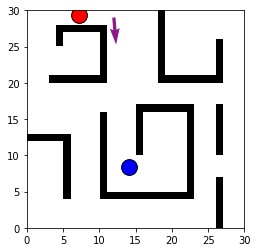

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 1.97 in 467 iterations (20 vertices in the graph)
Debug:   CostConvergenceTerminationCondition: Cost of optimizing planner converged after 10 solutions
Info:    RRTstar: Created 153 new states. Checked 11781 rewire options. 2 goal states in tree. Final solution cost 1.320
Info:    Solution found in 0.052367 seconds
Info:    SimpleSetup: Path simplification took 0.004072 seconds and changed from 6 to 5 states


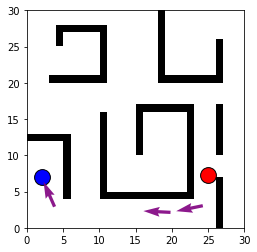

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 2.96 in 1546 iterations (307 vertices in the graph)
Debug:   CostConvergenceTerminationCondition: Cost of optimizing planner converged after 10 solutions
Info:    RRTstar: Created 1046 new states. Checked 350255 rewire options. 4 goal states in tree. Final solution cost 1.555
Info:    Solution found in 0.479873 seconds
Info:    SimpleSetup: Path simplification took 0.002995 seconds and changed from 5 to 4 states


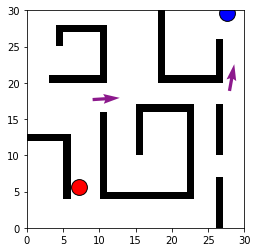

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 2.43 in 3907 iterations (812 vertices in the graph)
Debug:   CostConvergenceTerminationCondition: Cost of optimizing planner converged after 10 solutions
Info:    RRTstar: Created 3610 new states. Checked 1610509 rewire options. 5 goal states in tree. Final solution cost 1.963
Info:    Solution found in 3.499603 seconds
Info:    SimpleSetup: Path simplification took 0.004001 seconds and changed from 8 to 8 states


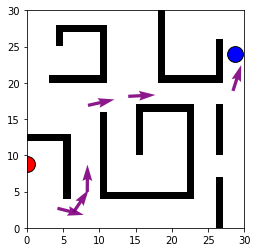

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 1.91 in 1209 iterations (262 vertices in the graph)
Debug:   CostConvergenceTerminationCondition: Cost of optimizing planner converged after 10 solutions
Info:    RRTstar: Created 3897 new states. Checked 1761334 rewire options. 3 goal states in tree. Final solution cost 1.312
Info:    Solution found in 3.193326 seconds
Info:    SimpleSetup: Path simplification took 0.004522 seconds and changed from 6 to 4 states


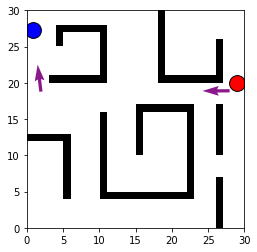

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 1.21 in 274 iterations (21 vertices in the graph)
Info:    RRTstar: Created 4029 new states. Checked 1831162 rewire options. 6 goal states in tree. Final solution cost 0.835
Info:    Solution found in 4.001124 seconds
Info:    SimpleSetup: Path simplification took 0.000653 seconds and changed from 3 to 3 states


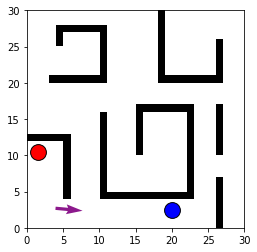

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 1.95 in 7354 iterations (2073 vertices in the graph)
Info:    RRTstar: Created 3555 new states. Checked 1581768 rewire options. 1 goal states in tree. Final solution cost 1.455
Info:    Solution found in 4.000271 seconds
Debug:   The solution path was slightly touching on an invalid region of the state space, but it was successfully fixed.
Info:    SimpleSetup: Path simplification took 0.003775 seconds and changed from 6 to 6 states


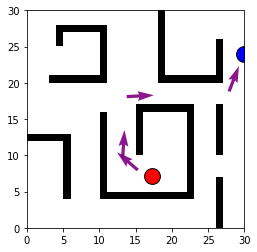

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 1.11 in 1636 iterations (413 vertices in the graph)
Debug:   CostConvergenceTerminationCondition: Cost of optimizing planner converged after 10 solutions
Info:    RRTstar: Created 2913 new states. Checked 1250534 rewire options. 3 goal states in tree. Final solution cost 0.910
Info:    Solution found in 2.407360 seconds
Info:    SimpleSetup: Path simplification took 0.002209 seconds and changed from 4 to 4 states


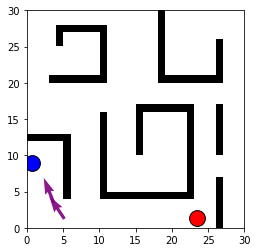

Info:    RRTstar: Started planning with 1 states. Seeking a solution better than 0.00000.
Info:    RRTstar: Initial k-nearest value of 45
Info:    RRTstar: Found an initial solution with a cost of 3.89 in 8199 iterations (1103 vertices in the graph)


KeyboardInterrupt: 

In [45]:
# generate planning data, car scenario

nData = 1000 # number of plans to generate

minDistThreshold = 0.5 # minimum distance threshold betwen start/goal

trajSamples = np.zeros(shape=(1, 4)) # x, y, xdot, ydot
newInitData = np.zeros(shape=(1, 4)) # x, y, xdot, ydot
newGoalData = np.zeros(shape=(1, 4))

planObj = problemDef()

plotPaths = True
i = 0 
nPlans = 0 # number of completed plans
while nPlans < nData:

    start = np.array([0, 0, 0]) # x, y, yaw
    goal  = np.copy(start)
    ux = 0; vx = 0; uy = 0; vy = 0
    
    while True:
        start = np.array([np.random.uniform(low=0.001, high=0.999), np.random.uniform(low=0.001, high=0.999), 0])
        goal  = np.array([np.random.uniform(low=0.001, high=0.999), np.random.uniform(low=0.001, high=0.999), 0])
        ux = int(np.floor(start[0] * gridSize)) # right pointing image axis
        vx = int(np.floor(gridSize * (1 - start[1]))) # down pointing image axis
        uy = int(np.floor(goal[0] * gridSize)) # right pointing image axis
        vy = int(np.floor(gridSize * (1 - goal[1]))) # down pointing image axis
        if np.linalg.norm(start[:2] - goal[:2]) > minDistThreshold and inflatedGrid[vx,ux] > 0 and inflatedGrid[vy,uy] > 0:
            break

    plan(planObj, start, goal)

    if planObj.getProblemDefinition().hasExactSolution():

        sol = np.loadtxt(StringIO(planObj.getSolutionPath().printAsMatrix()))
        dxdy = np.concatenate((sol[1:,0:2] - sol[:-1,0:2], (goal[:2] - sol[-1,0:2]).reshape(1, 2)), axis=0)
        nSamples = sol.shape[0]

        xydot = dxdy / np.linalg.norm(dxdy, axis=1).reshape(nSamples,1)

        sol = sol[1:-1]
        xydot = xydot[1:-1]

        trajSamples = np.vstack((trajSamples, np.hstack((sol[:, 0:2], xydot)))) # x, y, xdot, ydot
        newInitData = np.vstack((newInitData, np.tile(np.append(start[0:2], [np.cos(start[-1]), np.sin(start[-1])]), reps=(nSamples, 1)))) # x, y, yaw, xdot, ydot
        newGoalData = np.vstack((newGoalData, np.tile(np.append(goal[0:2], [np.cos(goal[-1]), np.sin(goal[-1])]), reps=(nSamples, 1)))) # x, y, yaw, xdot, ydot
        
        if plotPaths:
            fig, ax = plt.subplots()
            ax.scatter(start[0] * gridSize, start[1] * gridSize, color="red", s=250, edgecolors='black')
            ax.scatter(goal[0] * gridSize, goal[1] * gridSize, color="blue", s=250, edgecolors='black')
            #ax.scatter(sol[:, 0] * gridSize, sol[:, 1] * gridSize, color="purple", s=70)
            ax.quiver(sol[:, 0] * gridSize, sol[:, 1] * gridSize, xydot[:, 0], xydot[:, 1], color="purple", scale=8.0, width=0.015, alpha=0.9)
            ax.imshow(occGrid, extent=[0, gridSize, 0, gridSize], cmap='gray')
            plt.show()

        nPlans += 1
        if nPlans % 100 == 0:
            newData = np.concatenate((trajSamples, newInitData, newGoalData), axis=1)[1:]
            np.savetxt('/home/oscar_palfelt/MSc_thesis/EECS_Degree_Project/motion_planning/data/pathDataDifficult_i' + str(i), newData, delimiter=',', fmt='%1.6f')
  
    planObj.clear()
    i += 1  

    #ob.ProblemDefinition.getSolution

newData = np.concatenate((trajSamples, newInitData, newGoalData), axis=1)[1:]
np.savetxt('/home/oscar_palfelt/MSc_thesis/EECS_Degree_Project/motion_planning/data/pathDataDifficult', newData, delimiter=',', fmt='%1.6f')
